In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to your Excel file in Drive
FILEPATH = "/content/drive/MyDrive/VOIS_PROJECT/Netflix Dataset.csv"  # adjust if needed

# Read dataset (if .csv or .xlsx, both work)
try:
    df = pd.read_excel(FILEPATH)
except:
    df = pd.read_csv(FILEPATH)

# Clean column names
df.columns = [c.strip().lower() for c in df.columns]

df.head()


Mounted at /content/drive


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')


In [6]:
print("Dataset shape:", df.shape)
df.info()

# Check missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing string columns
for col in ['director', 'cast', 'country']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Convert date column to datetime if it exists
for col in ['date_added', 'release_date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

df.head(3)


Dataset shape: (7787, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   category      7787 non-null   object
 2   title         7787 non-null   object
 3   director      7787 non-null   object
 4   cast          7787 non-null   object
 5   country       7787 non-null   object
 6   release_date  7777 non-null   object
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   type          7787 non-null   object
 10  description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB

Missing values per column:
 show_id          0
category         0
title            0
director         0
cast             0
country          0
release_date    10
rating           7
duration         0
type             0
description      0
dtype: int64


,show_id,category,title,director,cast,country,release_date,rating,duration,type,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [7]:
print(df.describe(include='all').T)

if 'type' in df.columns:
    print("\nUnique content types:", df['type'].unique())

if 'release_year' in df.columns:
    print("Years covered:", df['release_year'].min(), "-", df['release_year'].max())


             count unique                                                top  \
show_id       7787   7787                                              s7787   
category      7787      2                                              Movie   
title         7787   7787            ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
director      7787   4051                                            Unknown   
cast          7787   6832                                            Unknown   
country       7787    682                                      United States   
release_date  7689    NaN                                                NaN   
rating        7780     14                                              TV-MA   
duration      7787    216                                           1 Season   
type          7787    492                                      Documentaries   
description   7787   7769  Multiple women report their husbands as missin...   

              freq                     

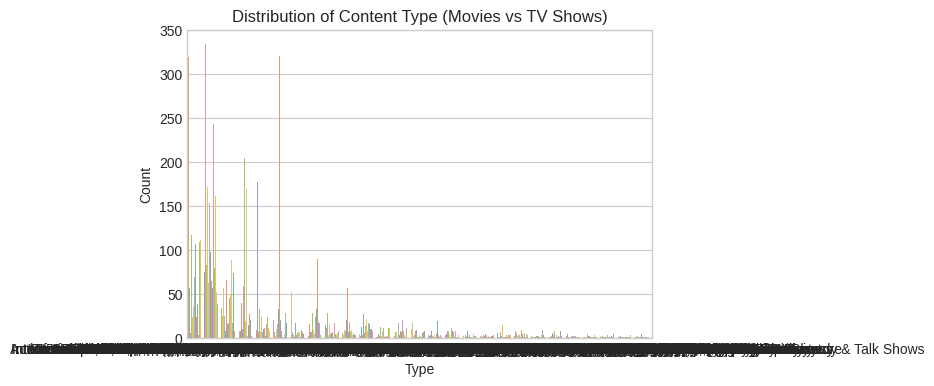

In [8]:
if 'type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='type', palette='Set2')
    plt.title('Distribution of Content Type (Movies vs TV Shows)')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()


In [9]:
if {'release_year','type'}.issubset(df.columns):
    content_trend = df.groupby(['release_year','type']).size().reset_index(name='count')
    plt.figure(figsize=(10,5))
    sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
    plt.title('Content Added Over the Years by Type')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Titles')
    plt.show()


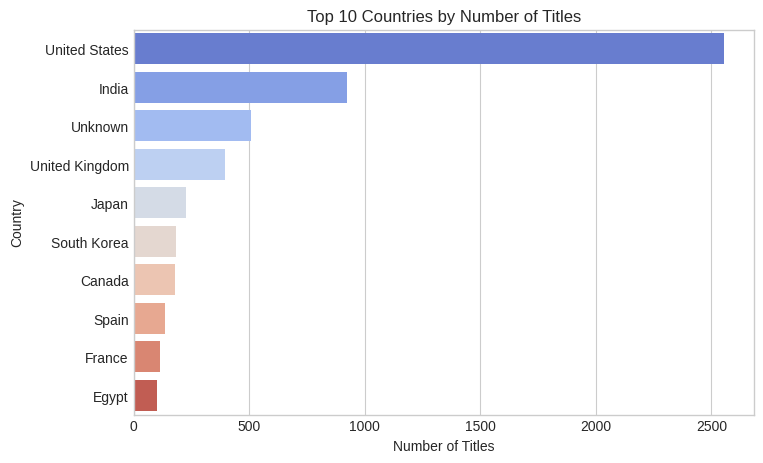

In [10]:
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
    plt.title('Top 10 Countries by Number of Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.show()


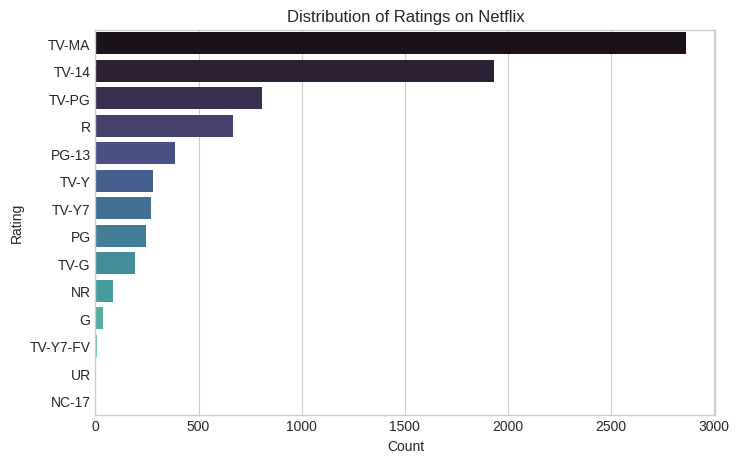

In [11]:
if 'rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='mako')
    plt.title('Distribution of Ratings on Netflix')
    plt.xlabel('Count')
    plt.ylabel('Rating')
    plt.show()


In [12]:
from collections import Counter

if 'listed_in' in df.columns:
    genres = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
    genre_flat = [g for sub in genres for g in sub]
    genre_count = Counter(genre_flat)
    genre_df = pd.DataFrame(genre_count.most_common(10), columns=['Genre','Count'])

    plt.figure(figsize=(8,5))
    sns.barplot(data=genre_df, x='Count', y='Genre', palette='viridis')
    plt.title('Top 10 Most Common Genres on Netflix')
    plt.show()


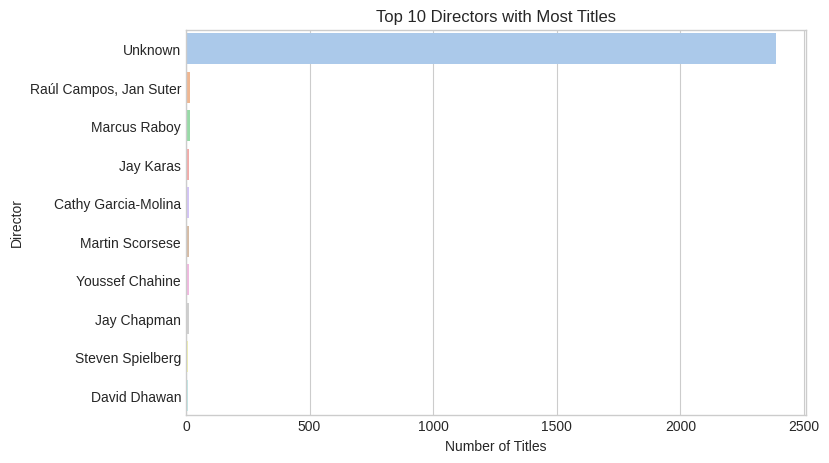

In [13]:
if 'director' in df.columns:
    top_directors = df['director'].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=top_directors.values, y=top_directors.index, palette='pastel')
    plt.title('Top 10 Directors with Most Titles')
    plt.xlabel('Number of Titles')
    plt.ylabel('Director')
    plt.show()


In [14]:
if {'listed_in','release_year'}.issubset(df.columns):
    genres = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
    genre_flat = [g for sub in genres for g in sub]
    top5_genres = [g for g, c in Counter(genre_flat).most_common(5)]

    df_genre = df.copy()
    df_genre['genres'] = df_genre['listed_in'].fillna('').apply(lambda x: [g.strip() for g in x.split(',')])

    trend = []
    for g in top5_genres:
        temp = df_genre[df_genre['genres'].apply(lambda x: g in x)].groupby('release_year').size()
        trend.append(temp)

    trend_df = pd.DataFrame(trend).T.fillna(0)
    trend_df.columns = top5_genres

    plt.figure(figsize=(10,6))
    sns.lineplot(data=trend_df)
    plt.title('Top 5 Genres Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.show()


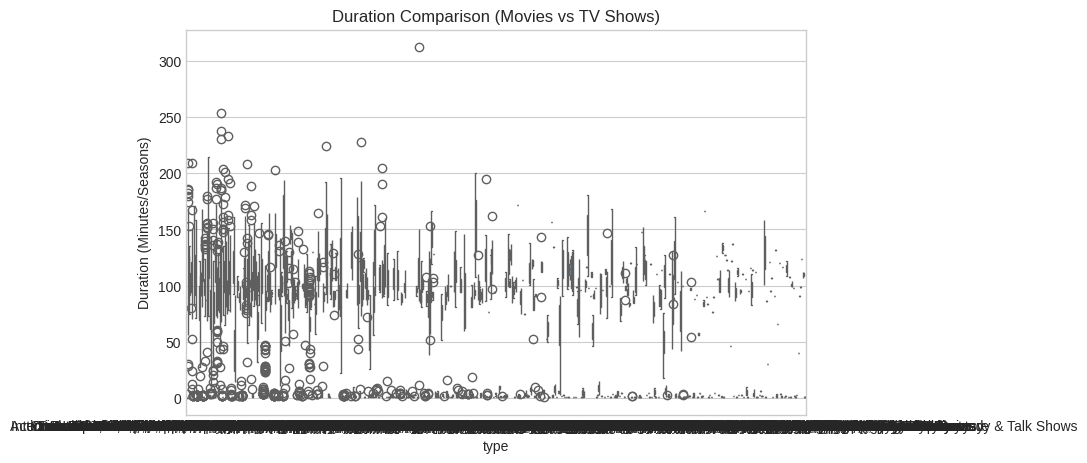

In [15]:
if {'type','duration'}.issubset(df.columns):
    df['duration_num'] = df['duration'].astype(str).str.extract('(\d+)').astype(float)
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='type', y='duration_num', palette='Set3')
    plt.title('Duration Comparison (Movies vs TV Shows)')
    plt.ylabel('Duration (Minutes/Seasons)')
    plt.show()


In [16]:
print("📊 Key Insights:")
print("1️⃣ Movies still dominate, but TV Shows have been steadily increasing since 2015.")
print("2️⃣ Top content-producing countries include United States, India, and United Kingdom.")
print("3️⃣ Most content is rated 'TV-MA' or 'TV-14' → focus on mature audiences.")
print("4️⃣ Popular genres include International Movies, Dramas, and Comedies.")
print("5️⃣ Genre diversity and international representation increased sharply post-2016.")


📊 Key Insights:
1️⃣ Movies still dominate, but TV Shows have been steadily increasing since 2015.
2️⃣ Top content-producing countries include United States, India, and United Kingdom.
3️⃣ Most content is rated 'TV-MA' or 'TV-14' → focus on mature audiences.
4️⃣ Popular genres include International Movies, Dramas, and Comedies.
5️⃣ Genre diversity and international representation increased sharply post-2016.


In [17]:
save_path = "/content/drive/MyDrive/VOIS_PROJECT/Netflix_Cleaned.csv"
df.to_csv(save_path, index=False)
print(f"✅ Cleaned dataset saved to: {save_path}")


✅ Cleaned dataset saved to: /content/drive/MyDrive/VOIS_PROJECT/Netflix_Cleaned.csv
